# Data Wrangling - NLP
Now that we have dataset with features we're initially interested and lyrics (!), we'll use `NLTK` to do some NLP and extract some interesting features.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [432]:
sns.set_style('darkgrid')
sns.set_context("paper")
sns.set(font='serif')
sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
})
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option('display.max_columns', None)

In [91]:
df_proc1 = pd.read_feather('../data/processed/stage1_lyrics.feather')
df_proc1 = df_proc1.loc[df_proc1['lyrics'] != ''].reset_index()

In [92]:
df_proc1.shape

(2433, 24)

In [93]:
df_proc1.dtypes

index                          int64
songid                        object
spotify_track_id              object
artist_genre                  object
spotify_track_duration_ms    float64
spotify_track_popularity     float64
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                            bool
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
performer                     object
song                          object
lyrics                        object
peak_position                  int64
weeks_on_chart                 int64
instance                       int64
dtype: object

In [308]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

def clean_lyrics(row):
    """Remove punctuation or other characters that might skew analysis.
    
    Returns:
        lyrics_proc(list): tokenized list of words in lyrics
    
    """
    lyrics_proc = row['lyrics'].replace('\n', ' ')
    # Lyrics from Genius contain bracket delimited text indicating who
    # is singing.
    lyrics_proc = re.sub(r'\[.*?\]', '', lyrics_proc) 
    tokenizer = RegexpTokenizer(r'\w+')
    lyrics_proc = tokenizer.tokenize(lyrics_proc)
    lyrics_proc = [w for w in lyrics_proc 
                   if w not in stopwords.words('english') 
                   and len(w) > 1 
                   and w not in ['na','la']]
    return lyrics_proc 

def clean_minor_lyrics(row):
    """Minimum cleaning of lyrics"""
    lyrics_proc = row['lyrics'].replace('\n', ' ')
    # Lyrics from Genius contain bracket delimited text indicating who
    # is singing.j
    lyrics_proc = re.sub(r'\[.*?\]', '', lyrics_proc) 
    return lyrics_proc

def word_count(row):
    """Simple count of words in lyrics. Minor clean up done
    Requires an input column of tokenized lyrics.
    
    """
    wc = len(row['lyrics_proc'])
    return wc

def vocab_count(row):
    """Vocabulary count
    """
    vocab_count = len(set(row['lyrics_proc']))
    return vocab_count

def lex_div(row):
    """Determine lexical richness of lyrics. """
    return row['vocab_count'] / row['word_count']

For NLTK text processing where we're filtering out stop words, this can take a long time to compute.

In [98]:
df_proc1['lyrics_proc'] = df_proc1.apply(clean_lyrics, axis=1)
df_proc1['word_count'] = df_proc1.apply(word_count, axis=1)
df_proc1['vocab_count'] = df_proc1.apply(vocab_count, axis=1)
df_proc1['lex_div'] = df_proc1.apply(lex_div, axis=1)

In [208]:
df_proc1.head()

,index,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div
0,0,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",211493.0,74.0,0.549,0.853,7.0,-4.293,True,0.1880,0.0285,0.000296,0.6180,0.346,94.695,4.0,Snoop Doggy Dogg,Gin And Juice,[Intro: Daz Dillinger & (Snoop Dogg)]\n(Ugh) H...,8,20,1,"[Ugh, Ha, ha, ha, serious, nigga, One, niggas,...",344,184,0.534884
1,1,JeanOliver,5v4sUZA2Oyni7EtBL586V7,['alternative hip hop'],200066.0,29.0,0.323,0.127,3.0,-15.660,True,0.0321,0.8410,0.004130,0.1170,0.394,92.637,3.0,Oliver,Jean,"Jean, Jean, roses are red\nAll the leaves have...",2,14,1,"[Jean, Jean, roses, red, All, leaves, gone, gr...",89,51,0.573034
2,2,Holidae InChingy Featuring Ludacris & Snoop Dogg,0FmCLEHfINGqwlyzvklNqy,"['crunk', 'dance pop', 'dirty south rap', 'gan...",314400.0,63.0,0.810,0.791,7.0,-5.909,True,0.1810,0.0893,0.000000,0.0838,0.948,153.067,4.0,Chingy Featuring Ludacris & Snoop Dogg,Holidae In,"[Intro: Snoop Dogg]\nBomb ass pussy\nMa, ooh y...",3,21,1,"[Bomb, ass, pussy, Ma, ooh, got, bomb, know, g...",563,296,0.525755
3,3,Get AwayBobby Brown,62cC8knNydvmC1JPZExWTD,"['dance pop', 'funk', 'hip hop', 'new jack swi...",310497.0,40.0,0.816,0.765,1.0,-6.538,False,0.0378,0.0264,0.000017,0.0389,0.856,111.751,4.0,Bobby Brown,Get Away,"[Chorus]\nI've got to get away, I've got to ge...",14,16,1,"[got, get, away, got, get, away, got, get, awa...",322,148,0.459627
4,4,Fantastic VoyageCoolio,3QlTzofanSqDWywxEzGGE2,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",334440.0,51.0,0.888,0.584,7.0,-13.308,True,0.1120,0.0389,0.000003,0.0625,0.762,104.704,4.0,Coolio,Fantastic Voyage,#\n2Pac - Picture Me Rollin'\n50 Cent - Get In...,3,25,1,"[2Pac, Picture, Me, Rollin, 50, Cent, Get, In,...",321,235,0.732087


In [226]:
foo.columns

Index(['index', 'songid', 'spotify_track_id', 'artist_genre',
       'spotify_track_duration_ms', 'spotify_track_popularity', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'performer', 'song', 'lyrics', 'peak_position', 'weeks_on_chart',
       'instance', 'lyrics_proc', 'word_count', 'vocab_count', 'lex_div',
       'label'],
      dtype='object')

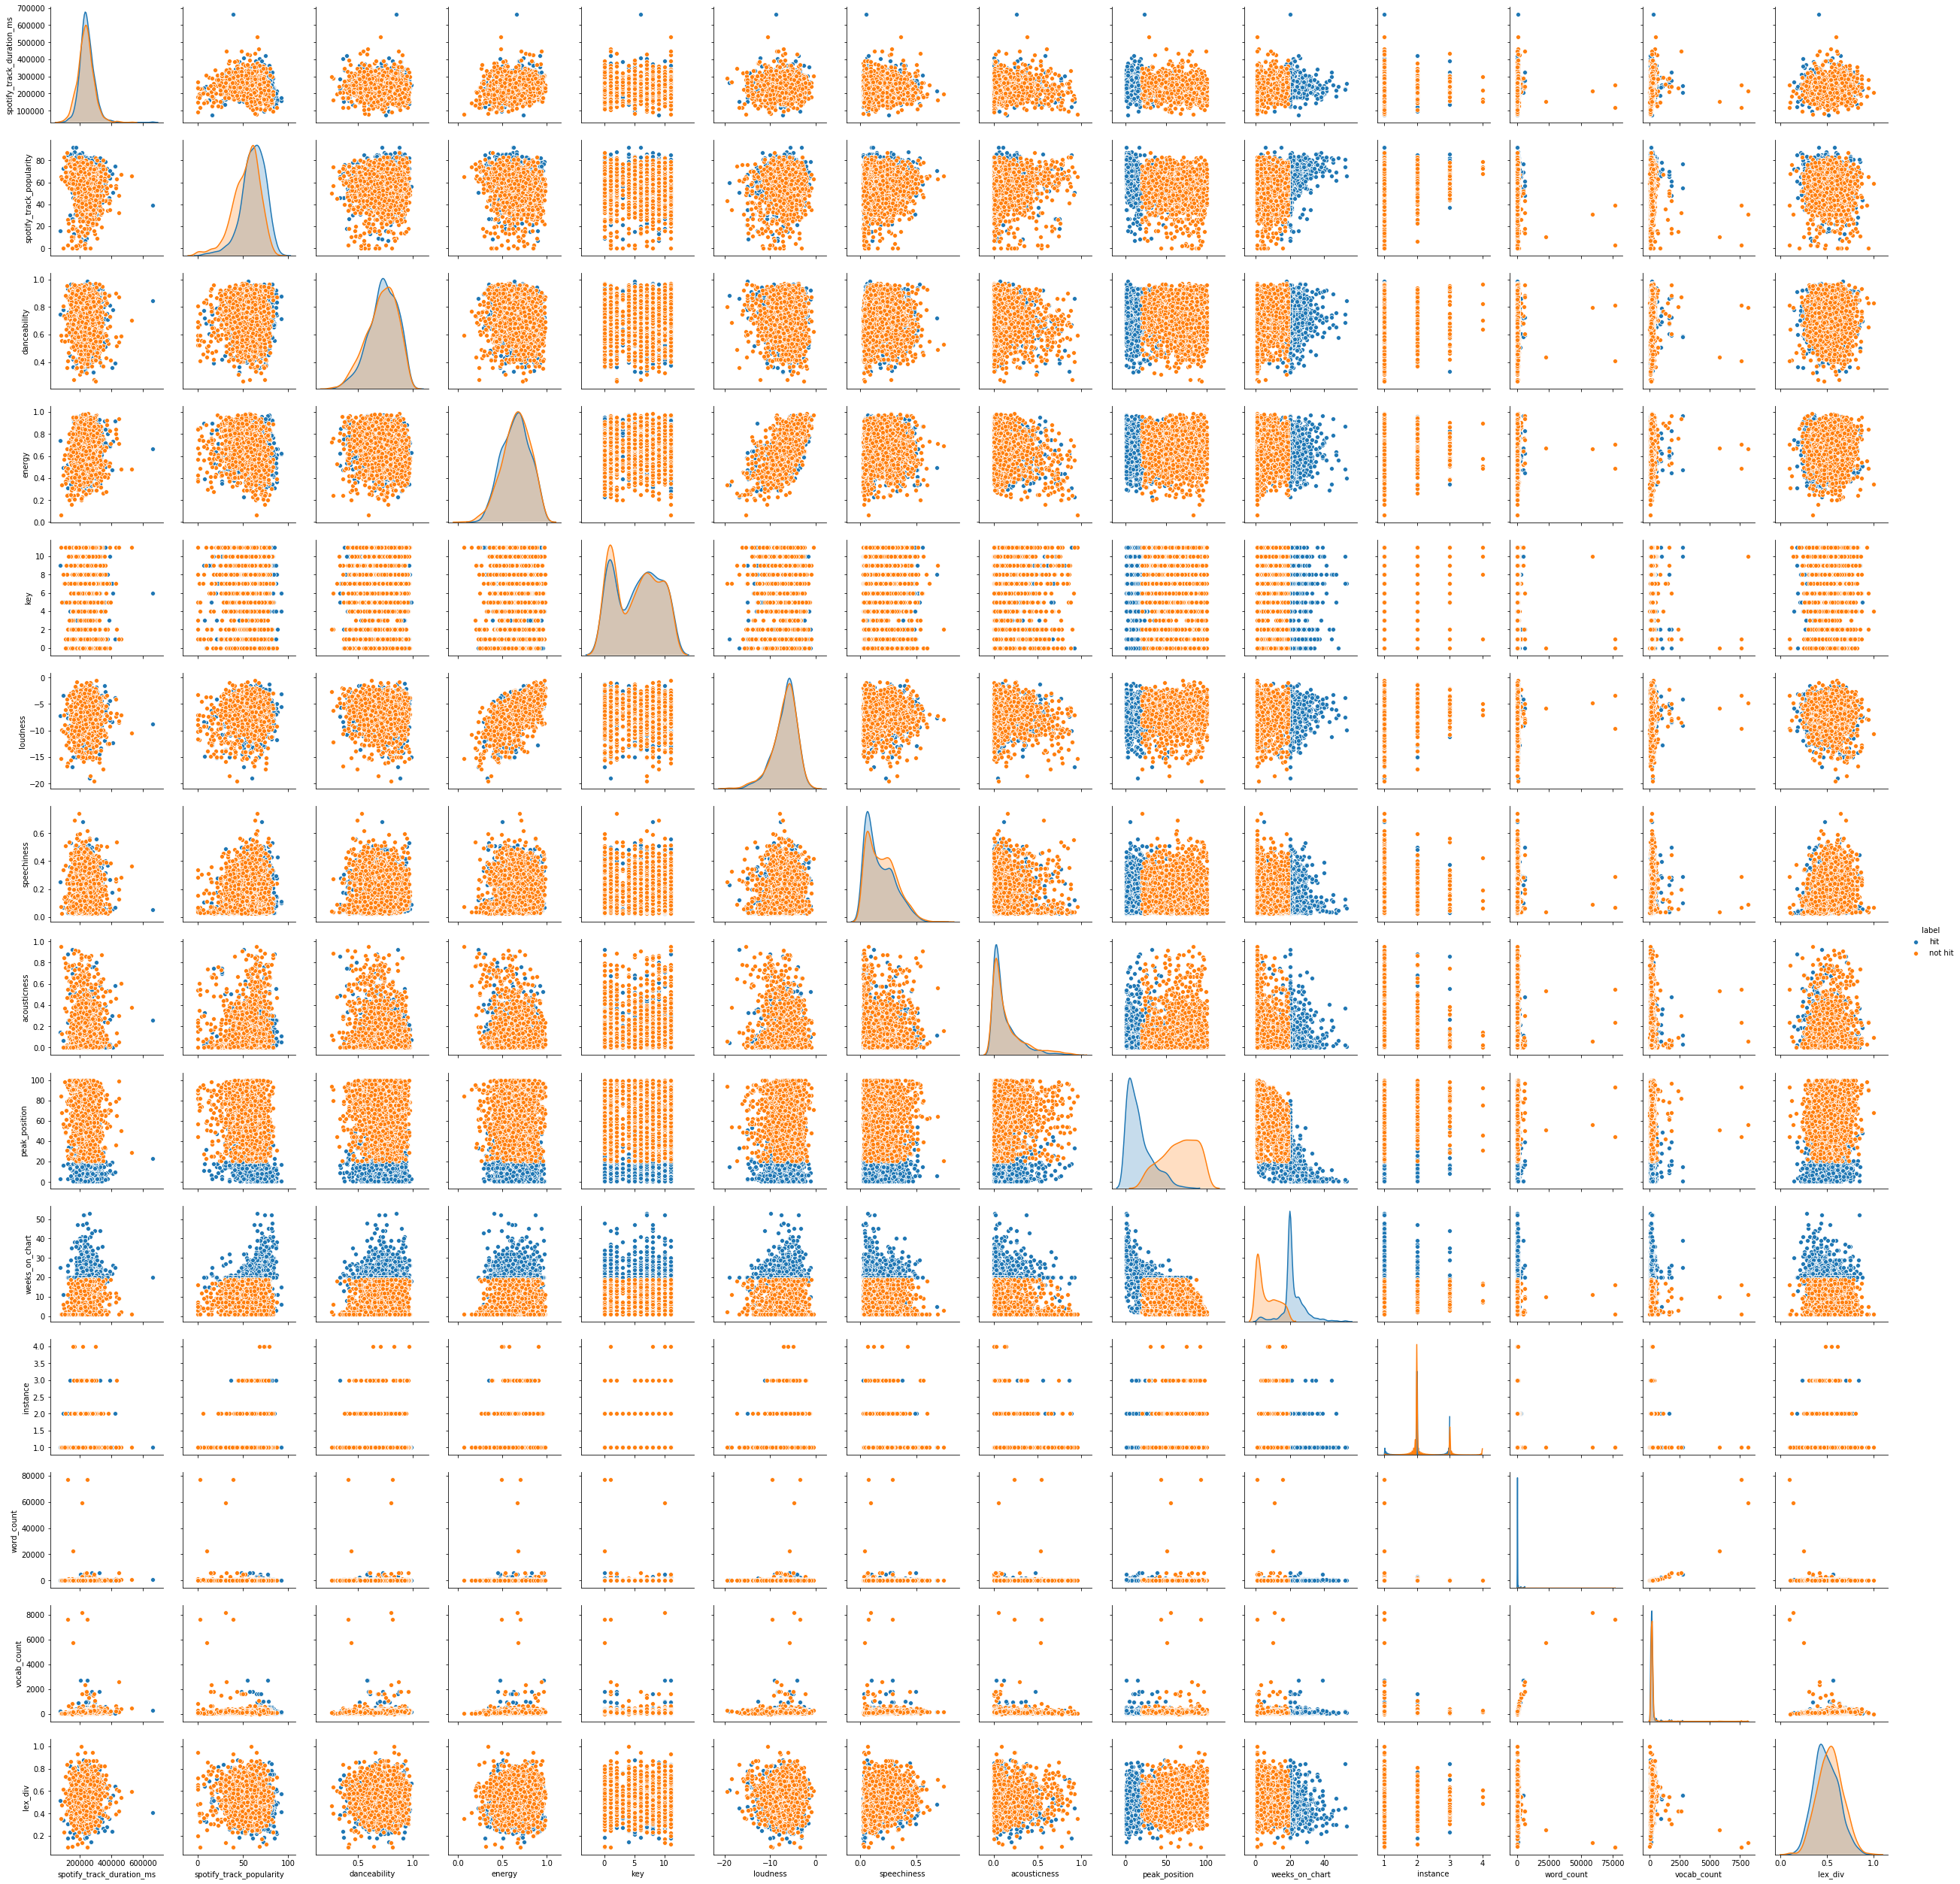

In [232]:
sns.pairplot(foo, vars=[ 'spotify_track_duration_ms', 'spotify_track_popularity', 'danceability',
                         'energy', 'key', 'loudness', 'speechiness', 'acousticness',
                         'peak_position', 'weeks_on_chart', 'instance', 
                         'vocab_count', 'lex_div'], hue='label')

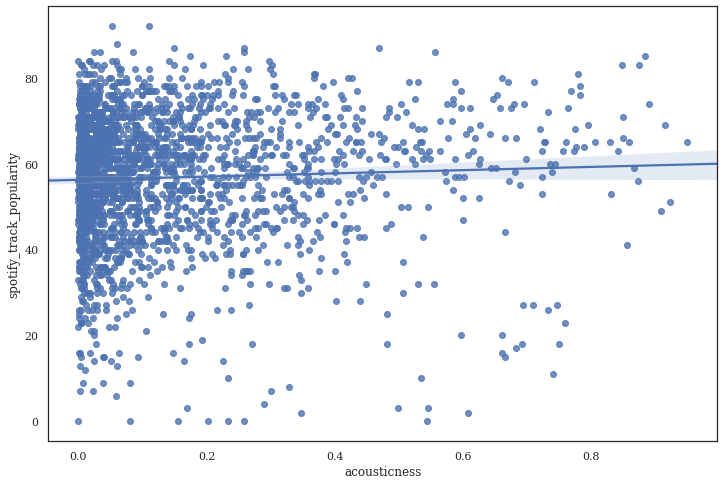

In [433]:
sns.regplot(data=foo, x='acousticness', y='spotify_track_popularity')

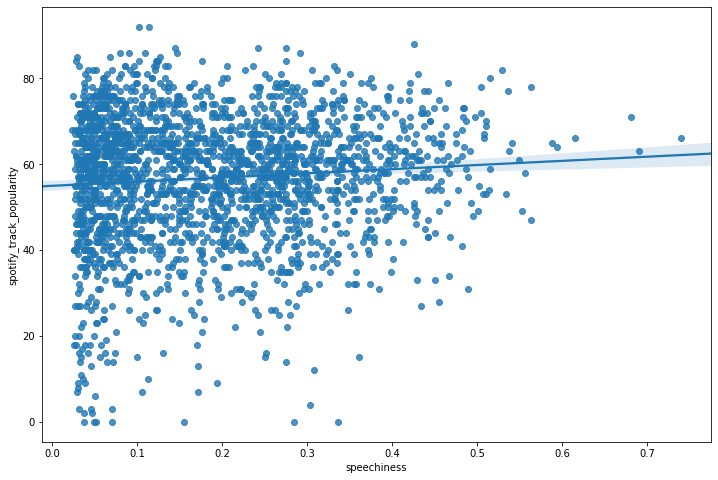

In [283]:
sns.regplot(data=foo, x='speechiness', y='spotify_track_popularity')

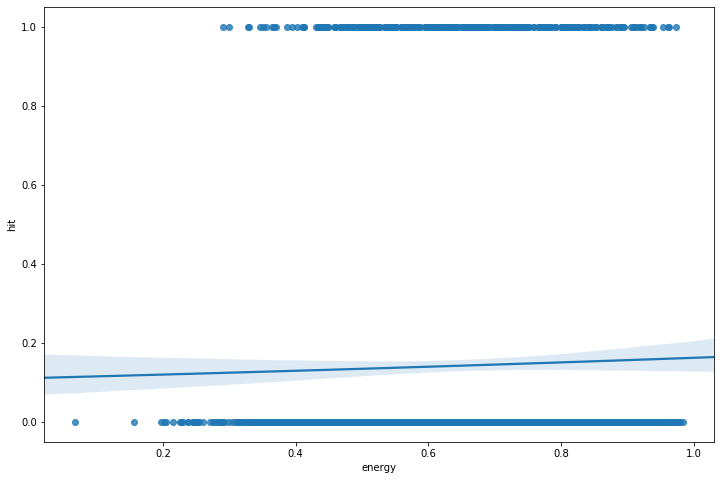

In [299]:
sns.regplot(data=foo, x='energy', y='hit', logistic=True)

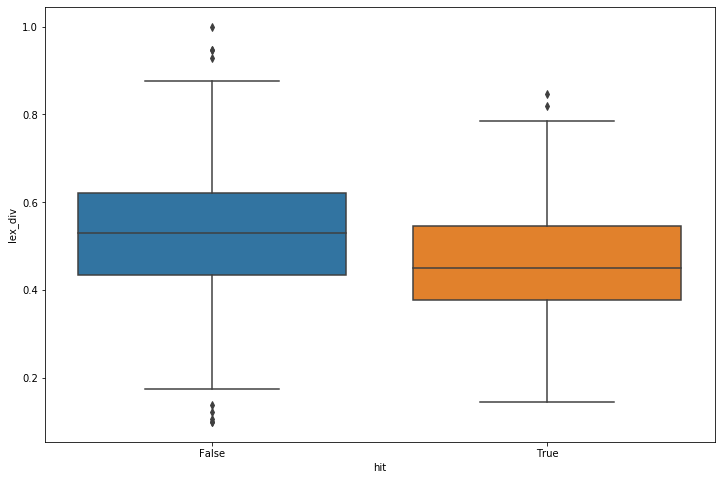

In [301]:
sns.boxplot(data=foo, y='lex_div', x='hit')
#plt.ylim(0, 1000) 

In [302]:
foo = df_proc1[df_proc1.artist_genre.str.contains('rap')]
(
    foo.groupby('performer').
    agg({'vocab_count': 'mean'}).
    reset_index().
    sort_values(by='vocab_count', ascending=False).
    head(50)
)

,performer,vocab_count
236,Da Brat Featuring Cherish,7617.000000
161,Candy & The Kisses,5759.000000
738,Method Man,2870.666667
2,112 Featuring Lil'z,2722.000000
876,Pitbull Featuring Ke$ha,2722.000000
243,Danny & The Juniors,1962.500000
85,Baby Boy Da Prince Featuring Lil Boosie,1820.000000
909,Queen Latifah Featuring Apache,1820.000000
917,Redman Featuring DJ Kool,1820.000000
537,Junior M.A.F.I.A. Featuring The Notorious B.I.G.,1820.000000


In [183]:
(
    foo.groupby('performer').
    agg({'lex_div': 'max'}).
    reset_index().
    sort_values(by='lex_div', ascending=False).
    head(10)
)

,performer,lex_div
1113,Tyga & Justin Bieber,1.000000
59,Action Bronson Featuring Chance The Rapper,0.947368
836,Notorious,0.947368
433,Ghostface Killah,0.929487
524,Joe,0.877193
160,Camp Lo,0.871849
123,Black Moon,0.871849
183,Chubb Rock,0.871849
1045,The Pharcyde,0.871849
975,Smif-N-Wessun,0.871595


In [110]:
df_proc1.loc[df_proc1.lex_div >= .95]

,index,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,...,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div
1578,1651,Swag Surfin'F.L.Y. (Fast Life Yungstaz),5ItzU5pBrFmRUudfr5RkJP,['atl hip hop'],249920.0,55.0,0.734,0.921,11.0,-5.663,...,F.L.Y. (Fast Life Yungstaz),Swag Surfin',"Lil Wayne - ""I'm Me""\nDorrough - ""Ice Cream Pa...",62,11,1,"[Lil, Wayne, Me, Dorrough, Ice, Cream, Paint, ...",47,46,0.978723
2200,2294,Wait For A MinuteTyga & Justin Bieber,1AcJJerSHcXCnevx9oSoWe,"['hip hop', 'pop rap', 'rap', 'trap']",207013.0,59.0,0.830,0.341,4.0,-10.625,...,Tyga & Justin Bieber,Wait For A Minute,Ssss,68,1,1,[Ssss],1,1,1.000000


In [131]:
foo.sort_values(by='weeks_on_chart', ascending=False).head(10)

,index,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,...,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div
2112,2203,Too CloseNext,5IFCyWplye09HytIP80RCF,"['boy band', 'dance pop', 'hip pop', 'minneapo...",259440.0,66.0,0.847,0.402,7.0,-9.952,...,Next,Too Close,[Intro]\nI wonder if she could tell I'm hard r...,1,53,1,"[wonder, could, tell, hard, right, Yeah, come,...",257,73,0.284047
2129,2221,Trap QueenFetty Wap,2d8JP84HNLKhmd6IYOoupQ,"['new jersey rap', 'pop rap', 'rap', 'southern...",222093.0,74.0,0.746,0.873,7.0,-3.803,...,Fetty Wap,Trap Queen,"[Intro]\nRGF productions\nRemy Boyz, yah-ah\n1...",2,52,1,"[RGF, productions, Remy, Boyz, yah, ah, 1738, ...",348,155,0.445402
1590,1663,See You AgainWiz Khalifa Featuring Charlie Puth,2JzZzZUQj3Qff7wapcbKjc,"['hip hop', 'pittsburgh rap', 'pop rap', 'rap'...",229525.0,81.0,0.689,0.481,10.0,-7.503,...,Wiz Khalifa Featuring Charlie Puth,See You Again,1. Lean On - Major Lazer x DJ Snake feat. MØ\n...,1,52,1,"[Lean, On, Major, Lazer, DJ, Snake, feat, MØ, ...",248,210,0.846774
2207,2301,The HillsThe Weeknd,7fBv7CLKzipRk6EC6TWHOB,"['canadian contemporary r&b', 'canadian pop', ...",242253.0,82.0,0.580,0.565,0.0,-7.065,...,The Weeknd,The Hills,[Intro]\nYeah\nYeah\nYeah\n\n[Verse 1]\nYour m...,1,48,1,"[Yeah, Yeah, Yeah, Your, man, road, doin, prom...",214,93,0.434579
1784,1861,You Make Me Wanna...Usher,47TqCCnEliDp8NRDyIQoQq,"['atl hip hop', 'dance pop', 'pop', 'pop rap',...",219120.0,69.0,0.761,0.639,5.0,-7.577,...,Usher,You Make Me Wanna...,"[Intro: Jermaine Dupri]\nThis is what you do, ...",2,47,1,"[This, This, You, make, wanna, leave, one, Sta...",272,82,0.301471
1946,2030,ApologizeTimbaland Featuring OneRepublic,6ucR4KfvsBFWCMVFDvyKKl,"['dance pop', 'hip hop', 'hip pop', 'pop', 'po...",184400.0,62.0,0.654,0.610,8.0,-6.051,...,Timbaland Featuring OneRepublic,Apologize,I'm holding on your rope\nGot me ten feet off ...,2,47,2,"[holding, rope, Got, ten, feet, ground, And, h...",101,54,0.534653
1340,1395,"Give Me EverythingPitbull Featuring Ne-Yo, Afr...",4QNpBfC0zvjKqPJcyqBy9W,"['dance pop', 'latin', 'miami hip hop', 'pop',...",252306.0,78.0,0.671,0.939,8.0,-3.206,...,"Pitbull Featuring Ne-Yo, Afrojack & Nayer",Give Me Everything,"[Letra de ""Give Me Everything (Tradução)"" Part...",1,45,1,"[Não, estou, trabalhando, duro, certo, fotogra...",538,161,0.299257
2318,2417,Yeah!Usher Featuring Lil Jon & Ludacris,5rb9QrpfcKFHM1EUbSIurX,"['atl hip hop', 'dance pop', 'pop', 'pop rap',...",250373.0,81.0,0.894,0.791,2.0,-4.699,...,Usher Featuring Lil Jon & Ludacris,Yeah!,[Produced by Lil Jon]\n\n[Intro: Usher & Lil J...,1,45,1,"[Peace, Town, Yeah, Okay, Lil, Jon, Yeah, yeah...",415,176,0.424096
397,424,RedboneChildish Gambino,0wXuerDYiBnERgIpbb3JBR,"['atl hip hop', 'hip hop', 'pop rap', 'rap']",326933.0,82.0,0.743,0.347,1.0,-11.174,...,Childish Gambino,Redbone,[Verse 1]\nDaylight\nI wake up feeling like yo...,12,44,3,"[Daylight, wake, feeling, like, play, right, u...",181,73,0.403315
513,544,I Wanna KnowJoe,1m2xMsxbtxv21Brome189p,"['dance pop', 'east coast hip hop', 'gangster ...",296693.0,66.0,0.725,0.487,8.0,-5.959,...,Joe,I Wanna Know,"[Intro]\nYeah, oh yeah\nAlright, oh, oh, oh\n\...",4,44,1,"[Yeah, oh, yeah, Alright, oh, oh, oh, It, amaz...",237,88,0.371308


In [121]:
for i in (df_proc1[df_proc1.songid == 'You Make Me Wanna...Usher']['artist_genre']):
    print(i)

['atl hip hop', 'dance pop', 'pop', 'pop rap', 'r&b', 'urban contemporary']


In [126]:
df_proc1.shape

(2433, 28)

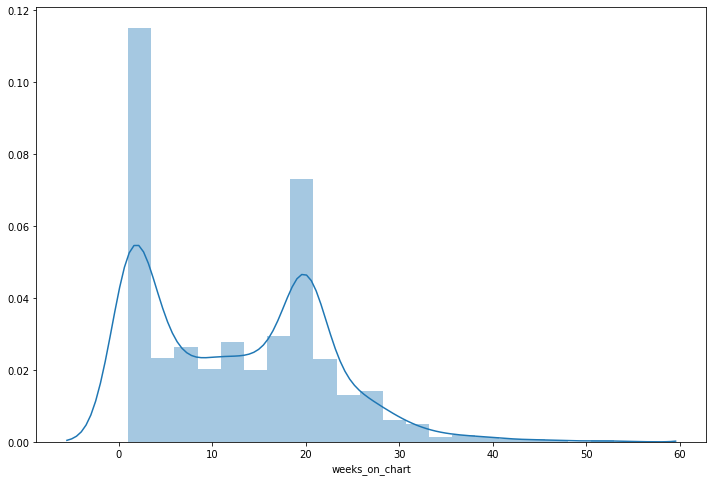

In [132]:
sns.distplot(foo.weeks_on_chart)

In [376]:
foo = pd.read_csv('../data/processed/stage2_lyrics.csv')
foo.drop(columns='Unnamed: 0', inplace=True)

In [378]:
foo.head()

,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div
0,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",211493.0,74.0,0.549,0.853,7.0,-4.293,True,0.1880,0.0285,0.000296,0.6180,0.346,94.695,4.0,Snoop Doggy Dogg,Gin And Juice,"(Ugh) Ha-ha-ha, I'm serious, nigga One of y'a...",8,20,1,"['Ugh', 'Ha', 'ha', 'ha', 'serious', 'nigga', ...",344,184,0.534884
1,Holidae InChingy Featuring Ludacris & Snoop Dogg,0FmCLEHfINGqwlyzvklNqy,"['crunk', 'dance pop', 'dirty south rap', 'gan...",314400.0,63.0,0.810,0.791,7.0,-5.909,True,0.1810,0.0893,0.000000,0.0838,0.948,153.067,4.0,Chingy Featuring Ludacris & Snoop Dogg,Holidae In,"Bomb ass pussy Ma, ooh you got that bomb, kno...",3,21,1,"['Bomb', 'ass', 'pussy', 'Ma', 'ooh', 'got', '...",563,296,0.525755
2,Get AwayBobby Brown,62cC8knNydvmC1JPZExWTD,"['dance pop', 'funk', 'hip hop', 'new jack swi...",310497.0,40.0,0.816,0.765,1.0,-6.538,False,0.0378,0.0264,0.000017,0.0389,0.856,111.751,4.0,Bobby Brown,Get Away,"I've got to get away, I've got to get away I'...",14,16,1,"['got', 'get', 'away', 'got', 'get', 'away', '...",322,148,0.459627
3,Fantastic VoyageCoolio,3QlTzofanSqDWywxEzGGE2,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",334440.0,51.0,0.888,0.584,7.0,-13.308,True,0.1120,0.0389,0.000003,0.0625,0.762,104.704,4.0,Coolio,Fantastic Voyage,# 2Pac - Picture Me Rollin' 50 Cent - Get In M...,3,25,1,"['2Pac', 'Picture', 'Me', 'Rollin', '50', 'Cen...",321,235,0.732087
4,"I'm On OneDJ Khaled Featuring Drake, Rick Ross...",608a1wIsSd5KzMEqm1O7w3,"['dance pop', 'hip hop', 'miami hip hop', 'pop...",296146.0,68.0,0.508,0.809,11.0,-3.454,False,0.2920,0.0580,0.000000,0.6080,0.489,149.999,4.0,"DJ Khaled Featuring Drake, Rick Ross & Lil Wayne",I'm On One,The Rap Genius Editors Pick Their Own Top 10 S...,10,23,1,"['The', 'Rap', 'Genius', 'Editors', 'Pick', 'T...",2651,932,0.351565


In [379]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment(lyrics):
    sid = SentimentIntensityAnalyzer()
    comp = sid.polarity_scores(lyrics)
    return pd.Series([comp['pos'], comp['neg'], comp['neu'], comp['compound']])

In [380]:
foo[['sentiment_pos', 'sentiment_neg', 'sentiment_neu', 'sentiment_val']] = foo.apply(
    lambda row: sentiment(row['lyrics']), axis=1
)

In [381]:
foo

,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div,sentiment_pos,sentiment_neg,sentiment_neu,sentiment_val
0,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",211493.0,74.0,0.549,0.853,7.0,-4.293,True,0.1880,0.0285,0.000296,0.6180,0.346,94.695,4.0,Snoop Doggy Dogg,Gin And Juice,"(Ugh) Ha-ha-ha, I'm serious, nigga One of y'a...",8,20,1,"['Ugh', 'Ha', 'ha', 'ha', 'serious', 'nigga', ...",344,184,0.534884,0.046,0.103,0.851,-0.9921
1,Holidae InChingy Featuring Ludacris & Snoop Dogg,0FmCLEHfINGqwlyzvklNqy,"['crunk', 'dance pop', 'dirty south rap', 'gan...",314400.0,63.0,0.810,0.791,7.0,-5.909,True,0.1810,0.0893,0.000000,0.0838,0.948,153.067,4.0,Chingy Featuring Ludacris & Snoop Dogg,Holidae In,"Bomb ass pussy Ma, ooh you got that bomb, kno...",3,21,1,"['Bomb', 'ass', 'pussy', 'Ma', 'ooh', 'got', '...",563,296,0.525755,0.127,0.073,0.799,0.9907
2,Get AwayBobby Brown,62cC8knNydvmC1JPZExWTD,"['dance pop', 'funk', 'hip hop', 'new jack swi...",310497.0,40.0,0.816,0.765,1.0,-6.538,False,0.0378,0.0264,0.000017,0.0389,0.856,111.751,4.0,Bobby Brown,Get Away,"I've got to get away, I've got to get away I'...",14,16,1,"['got', 'get', 'away', 'got', 'get', 'away', '...",322,148,0.459627,0.059,0.076,0.864,-0.8737
3,Fantastic VoyageCoolio,3QlTzofanSqDWywxEzGGE2,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",334440.0,51.0,0.888,0.584,7.0,-13.308,True,0.1120,0.0389,0.000003,0.0625,0.762,104.704,4.0,Coolio,Fantastic Voyage,# 2Pac - Picture Me Rollin' 50 Cent - Get In M...,3,25,1,"['2Pac', 'Picture', 'Me', 'Rollin', '50', 'Cen...",321,235,0.732087,0.062,0.098,0.841,-0.9360
4,"I'm On OneDJ Khaled Featuring Drake, Rick Ross...",608a1wIsSd5KzMEqm1O7w3,"['dance pop', 'hip hop', 'miami hip hop', 'pop...",296146.0,68.0,0.508,0.809,11.0,-3.454,False,0.2920,0.0580,0.000000,0.6080,0.489,149.999,4.0,"DJ Khaled Featuring Drake, Rick Ross & Lil Wayne",I'm On One,The Rap Genius Editors Pick Their Own Top 10 S...,10,23,1,"['The', 'Rap', 'Genius', 'Editors', 'Pick', 'T...",2651,932,0.351565,0.087,0.082,0.831,0.8670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,The Way That You TalkJagged Edge Featuring Da ...,7w1cDpTllrHTwckLaMSGw9,"['atl hip hop', 'dance pop', 'hip hop', 'hip p...",218933.0,25.0,0.857,0.563,0.0,-9.566,False,0.2800,0.0739,0.000000,0.0992,0.754,92.025,4.0,Jagged Edge Featuring Da Brat & JD,The Way That You Talk,"It's scarey, I'm a subsidiary of So So Def, n...",65,9,1,"['It', 'scarey', 'subsidiary', 'So', 'So', 'De...",293,194,0.662116,0.115,0.075,0.810,0.9724
2240,The Way You MoveOutKast Featuring Sleepy Brown,5z7mYFfhw6N6f23VwrokJD,"['atl hip hop', 'dirty south rap', 'hip hop', ...",234000.0,66.0,0.871,0.597,5.0,-4.932,False,0.0464,0.1260,0.000115,0.0638,0.635,125.999,4.0,OutKast Featuring Sleepy Brown,The Way You Move,Part. 1 (Big Boi ft. Sleepy Brown - The Way Yo...,1,39,1,"['Part', 'Big', 'Boi', 'ft', 'Sleepy', 'Brown'...",596,262,0.439597,0.214,0.053,0.733,0.9995
2241,The WeekendSZA,6gU9OKjOE7ghfEd55oRO57,"['hip hop', 'pop', 'pop rap', 'rap']",272186.0,77.0,0.487,0.366,8.0,-9.405,False,0.0531,0.2410,0.000000,0.1260,0.161,68.191,5.0,SZA,The Weekend,"You say you got a girl Yeah, how you want me?...",33,24,1,"['You', 'say', 'got', 'girl', 'Yeah', 'want', ...",181,91,0.502762,0.162,0.072,0.766,0.9838
2242,The Whole WorldOutKast Featuring Killer Mike,074v54tSEWLbq3Hu5wf6uh,"['atl hip hop', 'dirty south rap', 'hip hop', ...",295346.0,49.0,0.815,0.852,2.0,-6.176,True,0.4010,0.0958,0.000001,0.0288,0.717,184.666,3.0,OutKast Featuring Killer Mike,The Whole World,"""Okay, here we go..."" Yeah, I'm afraid, like ...",19,20,1,"['Okay', 'go', 'Yeah', 'afraid', 

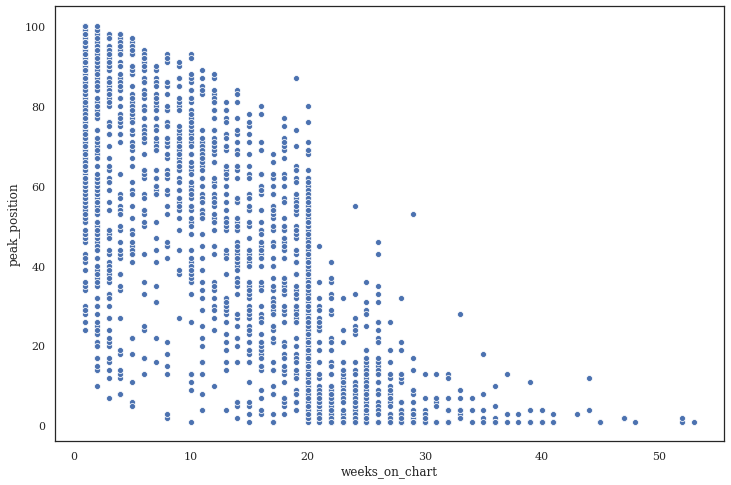

In [434]:
sns.scatterplot(foo.weeks_on_chart, foo.peak_position)

In [439]:
foo = foo.apply(sentiment, axis=1)

AttributeError: ("'Series' object has no attribute 'encode'", 'occurred at index 0')

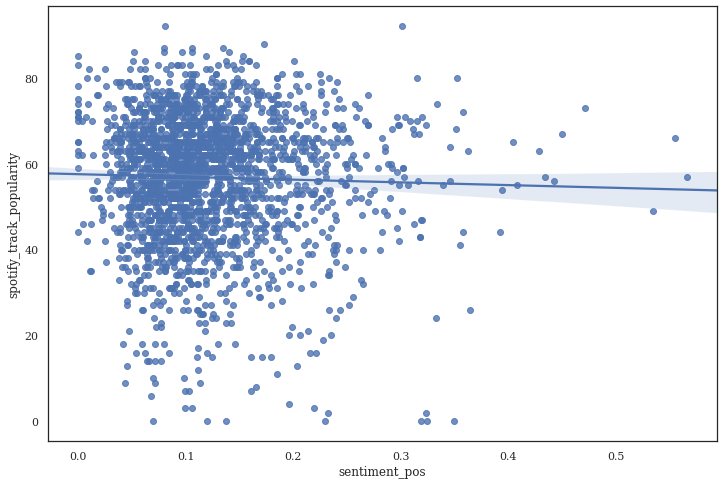

In [438]:
sns.regplot(data=foo, x='sentiment_pos', y='spotify_track_popularity')

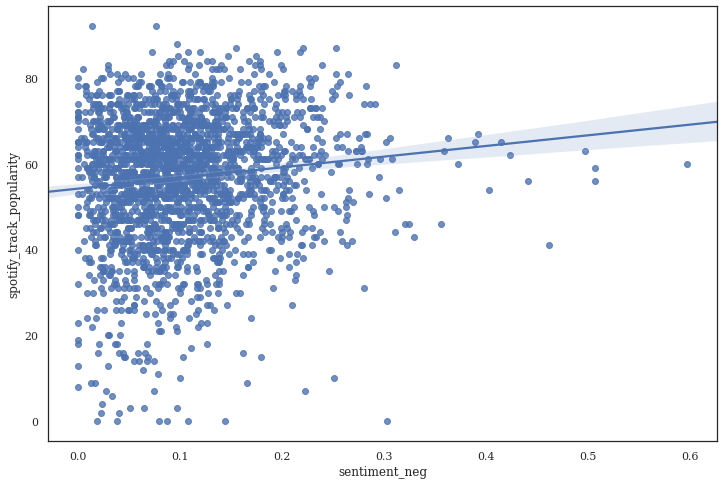

In [437]:
sns.regplot(data=foo, x='sentiment_neg', y='spotify_track_popularity')

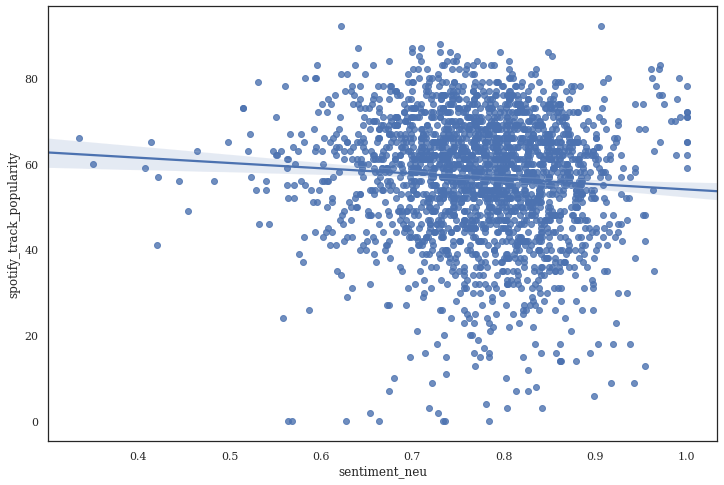

In [436]:
sns.regplot(data=foo, x='sentiment_neu', y='spotify_track_popularity')

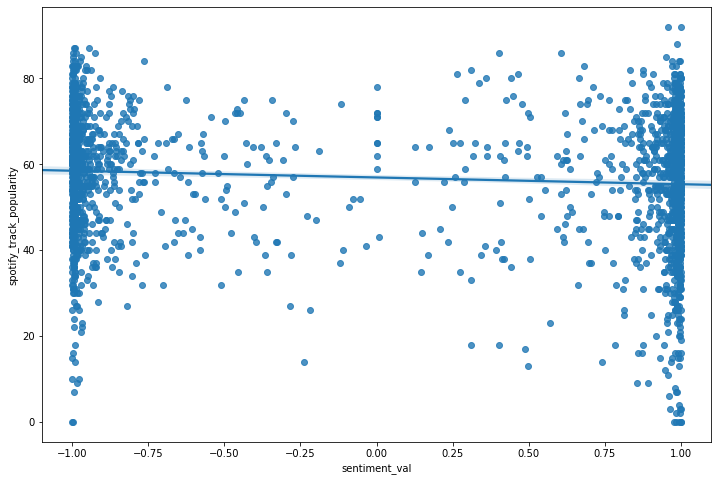

In [387]:
sns.regplot(data=foo, x='sentiment_val', y='spotify_track_popularity')

In [388]:
df_bb = pd.read_csv('../data/raw/hot_stuff_2.csv')

In [389]:
df_bb.head()

,url,weekid,week_position,song,performer,songid,instance,previous_week_position,peak_position,weeks_on_chart
0,http://www.billboard.com/charts/hot-100/1990-0...,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5


In [391]:
df_bb_sum = df_bb.groupby('songid').agg({'weekid': 'min'}).reset_index()

In [409]:
df_bb_sum['year'] = pd.to_numeric(df_bb_sum['weekid'].str[:4])
df_bb_sum['month'] = pd.to_numeric(df_bb_sum['weekid'].str[5:7])

In [411]:
df_bb_sum

,songid,weekid,year,month
0,"""B"" GirlsYoung And Restless",1990-05-05,1990,5
1,"""Cherry Cherry"" from Hot August NightNeil Diamond",1973-03-17,1973,3
2,"""Having A Party"" MedleyThe Ovations (Featuring...",1973-10-13,1973,10
3,"""Joy"" Pt. IIsaac Hayes",1973-12-22,1973,12
4,"""Roots"" MedleyQuincy Jones",1977-03-05,1977,3
...,...,...,...,...
28188,teachmeMusiq Soulchild,2007-05-26,2007,5
28189,whoa (mind in awe)XXXTENTACION,2018-12-22,2018,12
28190,whoknowsMusiq,2004-04-24,2004,4
28191,www.memoryAlan Jackson,2000-11-04,2000,11


In [410]:
foo = foo.merge(df_bb_sum)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [430]:
foo

,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div,sentiment_pos,sentiment_neg,sentiment_neu,sentiment_val,weekid,year,month
0,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",211493.0,74.0,0.549,0.853,7.0,-4.293,True,0.1880,0.0285,0.000296,0.6180,0.346,94.695,4.0,Snoop Doggy Dogg,Gin And Juice,"(Ugh) Ha-ha-ha, I'm serious, nigga One of y'a...",8,20,1,"['Ugh', 'Ha', 'ha', 'ha', 'serious', 'nigga', ...",344,184,0.534884,0.046,0.103,0.851,-0.9921,1994-01-29,1994,1
1,Holidae InChingy Featuring Ludacris & Snoop Dogg,0FmCLEHfINGqwlyzvklNqy,"['crunk', 'dance pop', 'dirty south rap', 'gan...",314400.0,63.0,0.810,0.791,7.0,-5.909,True,0.1810,0.0893,0.000000,0.0838,0.948,153.067,4.0,Chingy Featuring Ludacris & Snoop Dogg,Holidae In,"Bomb ass pussy Ma, ooh you got that bomb, kno...",3,21,1,"['Bomb', 'ass', 'pussy', 'Ma', 'ooh', 'got', '...",563,296,0.525755,0.127,0.073,0.799,0.9907,2003-09-20,2003,9
2,Get AwayBobby Brown,62cC8knNydvmC1JPZExWTD,"['dance pop', 'funk', 'hip hop', 'new jack swi...",310497.0,40.0,0.816,0.765,1.0,-6.538,False,0.0378,0.0264,0.000017,0.0389,0.856,111.751,4.0,Bobby Brown,Get Away,"I've got to get away, I've got to get away I'...",14,16,1,"['got', 'get', 'away', 'got', 'get', 'away', '...",322,148,0.459627,0.059,0.076,0.864,-0.8737,1993-01-16,1993,1
3,Fantastic VoyageCoolio,3QlTzofanSqDWywxEzGGE2,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",334440.0,51.0,0.888,0.584,7.0,-13.308,True,0.1120,0.0389,0.000003,0.0625,0.762,104.704,4.0,Coolio,Fantastic Voyage,# 2Pac - Picture Me Rollin' 50 Cent - Get In M...,3,25,1,"['2Pac', 'Picture', 'Me', 'Rollin', '50', 'Cen...",321,235,0.732087,0.062,0.098,0.841,-0.9360,1994-06-04,1994,6
4,"I'm On OneDJ Khaled Featuring Drake, Rick Ross...",608a1wIsSd5KzMEqm1O7w3,"['dance pop', 'hip hop', 'miami hip hop', 'pop...",296146.0,68.0,0.508,0.809,11.0,-3.454,False,0.2920,0.0580,0.000000,0.6080,0.489,149.999,4.0,"DJ Khaled Featuring Drake, Rick Ross & Lil Wayne",I'm On One,The Rap Genius Editors Pick Their Own Top 10 S...,10,23,1,"['The', 'Rap', 'Genius', 'Editors', 'Pick', 'T...",2651,932,0.351565,0.087,0.082,0.831,0.8670,2011-06-04,2011,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,The Way That You TalkJagged Edge Featuring Da ...,7w1cDpTllrHTwckLaMSGw9,"['atl hip hop', 'dance pop', 'hip hop', 'hip p...",218933.0,25.0,0.857,0.563,0.0,-9.566,False,0.2800,0.0739,0.000000,0.0992,0.754,92.025,4.0,Jagged Edge Featuring Da Brat & JD,The Way That You Talk,"It's scarey, I'm a subsidiary of So So Def, n...",65,9,1,"['It', 'scarey', 'subsidiary', 'So', 'So', 'De...",293,194,0.662116,0.115,0.075,0.810,0.9724,1997-09-20,1997,9
2240,The Way You MoveOutKast Featuring Sleepy Brown,5z7mYFfhw6N6f23VwrokJD,"['atl hip hop', 'dirty south rap', 'hip hop', ...",234000.0,66.0,0.871,0.597,5.0,-4.932,False,0.0464,0.1260,0.000115,0.0638,0.635,125.999,4.0,OutKast Featuring Sleepy Brown,The Way You Move,Part. 1 (Big Boi ft. Sleepy Brown - The Way Yo...,1,39,1,"['Part', 'Big', 'Boi', 'ft', 'Sleepy', 'Brown'...",596,262,0.439597,0.214,0.053,0.733,0.9995,2003-09-27,2003,9
2241,The WeekendSZA,6gU9OKjOE7ghfEd55oRO57,"['hip hop', 'pop', 'pop rap', 'rap']",272186.0,77.0,0.487,0.366,8.0,-9.405,False,0.0531,0.2410,0.000000,0.1260,0.161,68.191,5.0,SZA,The Weekend,"You say you got a girl Yeah, how you want me?...",33,24,1,"['You', 'say', 'got', 'girl', 'Yeah', 'want', ...",181,91,0.502762,0.162,0.072,0.766,0.9838,2017-08-19,2017,8
2242,The Whole WorldOutKast Featuring Killer Mike,074v54tSEWLbq3Hu5wf6uh,"['atl hip hop', 'dirty south rap', 'hip hop', ...",295346.0,49.0,0.815,0.852,2.0,-6.176,True,0.4010,0.0958,0

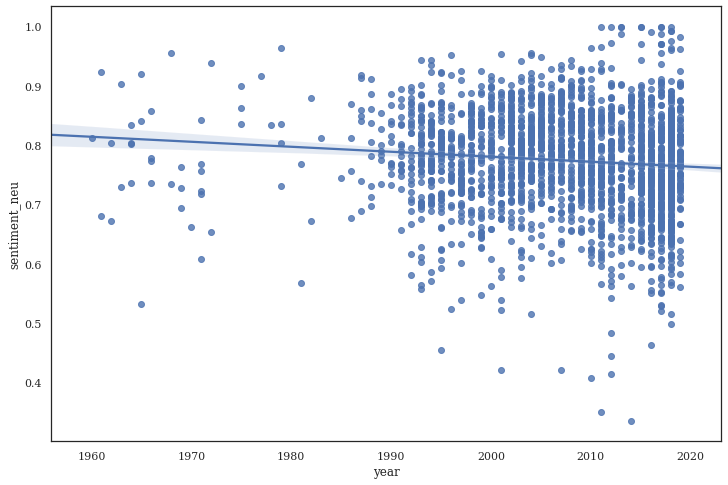

In [435]:
sns.regplot(data=foo, x='year', y='sentiment_neu')

In [429]:
foo.to_csv('../data/processed/stage3_sentiment.csv')

In [431]:
foo.head()

,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div,sentiment_pos,sentiment_neg,sentiment_neu,sentiment_val,weekid,year,month
0,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",211493.0,74.0,0.549,0.853,7.0,-4.293,True,0.1880,0.0285,0.000296,0.6180,0.346,94.695,4.0,Snoop Doggy Dogg,Gin And Juice,"(Ugh) Ha-ha-ha, I'm serious, nigga One of y'a...",8,20,1,"['Ugh', 'Ha', 'ha', 'ha', 'serious', 'nigga', ...",344,184,0.534884,0.046,0.103,0.851,-0.9921,1994-01-29,1994,1
1,Holidae InChingy Featuring Ludacris & Snoop Dogg,0FmCLEHfINGqwlyzvklNqy,"['crunk', 'dance pop', 'dirty south rap', 'gan...",314400.0,63.0,0.810,0.791,7.0,-5.909,True,0.1810,0.0893,0.000000,0.0838,0.948,153.067,4.0,Chingy Featuring Ludacris & Snoop Dogg,Holidae In,"Bomb ass pussy Ma, ooh you got that bomb, kno...",3,21,1,"['Bomb', 'ass', 'pussy', 'Ma', 'ooh', 'got', '...",563,296,0.525755,0.127,0.073,0.799,0.9907,2003-09-20,2003,9
2,Get AwayBobby Brown,62cC8knNydvmC1JPZExWTD,"['dance pop', 'funk', 'hip hop', 'new jack swi...",310497.0,40.0,0.816,0.765,1.0,-6.538,False,0.0378,0.0264,0.000017,0.0389,0.856,111.751,4.0,Bobby Brown,Get Away,"I've got to get away, I've got to get away I'...",14,16,1,"['got', 'get', 'away', 'got', 'get', 'away', '...",322,148,0.459627,0.059,0.076,0.864,-0.8737,1993-01-16,1993,1
3,Fantastic VoyageCoolio,3QlTzofanSqDWywxEzGGE2,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",334440.0,51.0,0.888,0.584,7.0,-13.308,True,0.1120,0.0389,0.000003,0.0625,0.762,104.704,4.0,Coolio,Fantastic Voyage,# 2Pac - Picture Me Rollin' 50 Cent - Get In M...,3,25,1,"['2Pac', 'Picture', 'Me', 'Rollin', '50', 'Cen...",321,235,0.732087,0.062,0.098,0.841,-0.9360,1994-06-04,1994,6
4,"I'm On OneDJ Khaled Featuring Drake, Rick Ross...",608a1wIsSd5KzMEqm1O7w3,"['dance pop', 'hip hop', 'miami hip hop', 'pop...",296146.0,68.0,0.508,0.809,11.0,-3.454,False,0.2920,0.0580,0.000000,0.6080,0.489,149.999,4.0,"DJ Khaled Featuring Drake, Rick Ross & Lil Wayne",I'm On One,The Rap Genius Editors Pick Their Own Top 10 S...,10,23,1,"['The', 'Rap', 'Genius', 'Editors', 'Pick', 'T...",2651,932,0.351565,0.087,0.082,0.831,0.8670,2011-06-04,2011,6
